In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (15,6)

In [14]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
from statsmodels.api import OLS, add_constant

In [4]:
df_orig = pd.read_csv('../data/train.csv',index_col=0, parse_dates=True)

In [23]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [22]:
df = df_orig.drop(['casual', 'registered','atemp'], axis = 1)

In [31]:
df_noy = df.drop(['count'], axis = 1)

In [32]:
# create X and y
X = df_noy
y = df['count']

X.shape, y.shape

((10886, 7), (10886,))

In [33]:
X.head()

,season,holiday,workingday,weather,temp,humidity,windspeed
datetime,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0
2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0
2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0
2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0
2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0


<AxesSubplot:>

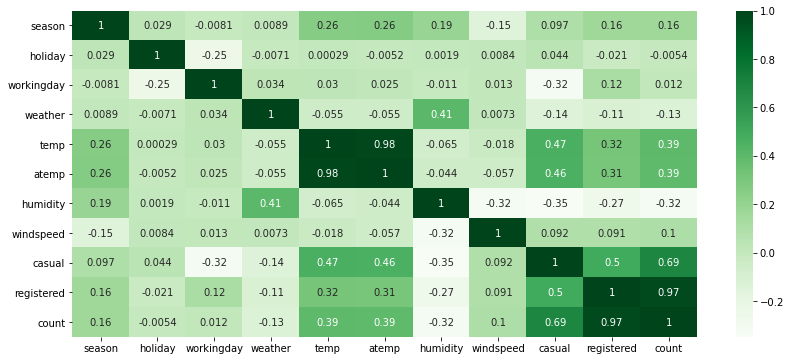

In [53]:
ax = plt.figure(figsize=(14,6))
#Xy_train = X_train.join(y_train.rename('y')) #joining dataseries together

pearsoncorr = df_orig.corr(method='pearson')
sns.heatmap(pearsoncorr, xticklabels = pearsoncorr.columns, yticklabels=pearsoncorr.columns,
            cmap = 'Greens', annot=True)

<AxesSubplot:>

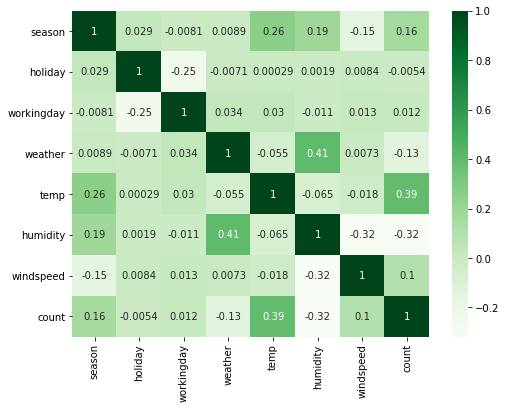

In [37]:
ax = plt.figure(figsize=(8,6))

pearsoncorr = df.corr(method='pearson')
sns.heatmap(pearsoncorr, xticklabels = pearsoncorr.columns, yticklabels=pearsoncorr.columns,
            cmap = 'Greens', annot=True)

In [ ]:
# temp and atemp shown to be very highly correlated (0.98) so one can be dropped

# casual + registered should be dropped as equal to count

# weather combination of temp, humidity, windspeed - combine data
# casual/registered have diff corr values for many (temp, workingday etc) - extract this and explore



### running Lasso Regularization

In [15]:
l = Lasso()

In [34]:
l.fit(X, y)

Lasso()

In [35]:
pd.DataFrame({'feature': X.columns, 'coefficient': np.abs(l.coef_)}).\
sort_values('coefficient', ascending=False)

,feature,coefficient
0,season,21.851484
4,temp,7.888700
5,humidity,2.972496
3,weather,2.348270
6,windspeed,0.574268
1,holiday,0.000000
2,workingday,0.000000


### Running RF Regressor

In [39]:
rf = RandomForestRegressor(max_depth=5, random_state=0)

In [40]:
rf.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [41]:
pd.DataFrame({'importance': rf.feature_importances_, 'feature': X.columns}).\
sort_values('importance', ascending=False) 

,importance,feature
4,0.455911,temp
5,0.425525,humidity
0,0.069072,season
2,0.031976,workingday
6,0.010396,windspeed
3,0.006419,weather
1,0.000703,holiday


In [19]:
df_orig.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [20]:
df_orig['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [21]:
df_orig.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


In [26]:
df_orig.index.resolution

'hour'

In [ ]:
# when plotting a timeseries, time index automatically used for x-axis
plt.plot(df_orig)

### Attempting the P-Value StatSig

In [42]:
forward_features = []

In [43]:
feature_list = X.columns

In [44]:
feature_list

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [47]:
possible_models = pd.DataFrame(columns=['features', 'p', 'r2'])

while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['feature', 'features', 'p', 'r2'])
    for feature in feature_list:
        m_feature = OLS(y, X[forward_features + [feature]])# <-- my LinReg model
        result = m_feature.fit()
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'r2': result.rsquared}
                                  , ignore_index=True)

    # p > 0.05 -> not significant
    # p <= 0.05 significant
    # p <= 0.01 very significant
    # p <= 0.001 highly significant

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

['season']
['season', 'temp']
['season', 'temp', 'humidity']
['season', 'temp', 'humidity', 'windspeed']
['season', 'temp', 'humidity', 'windspeed', 'weather']
['season', 'temp', 'humidity', 'windspeed', 'weather', 'workingday']


In [48]:
# all these features have significant p value
forward_features

['season', 'temp', 'humidity', 'windspeed', 'weather', 'workingday']

In [49]:
possible_models[['features', 'r2']]

,features,r2
0,[season],0.503347
1,"[season, temp]",0.603110
2,"[season, temp, humidity]",0.630424
3,"[season, temp, humidity, windspeed]",0.638786
4,"[season, temp, humidity, windspeed, weather]",0.639479
5,"[season, temp, humidity, windspeed, weather, w...",0.640058


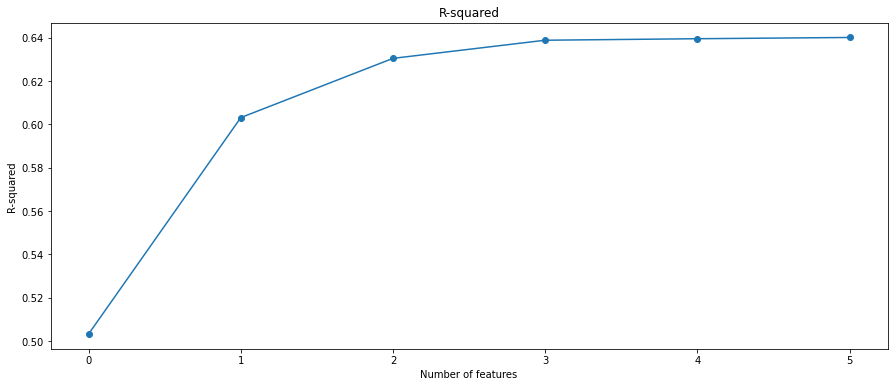

In [50]:
possible_models['r2'].plot(marker="o")
plt.title('R-squared')
plt.xlabel('Number of features')
plt.ylabel('R-squared')
plt.show()

### Plotting Time Series Data

In [59]:
t= df_orig.index
xx =sin(t);
yy =cos(t);
xxx = timeseries(xx,t);
yyy = timeseries(yy,t);
x1=squeeze(xxx.data);
y1=squeeze(yyy.data);
plot(x1,y1)

NameError: name 'sin' is not defined

In [58]:
df_orig.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)